In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [55]:
dp = os.path.join("..","data", "processed","data_scaled.csv")
df_scaled = pd.read_csv(dp)

dp = os.path.join("..","data", "processed","data_clean.csv")
df = pd.read_csv(dp)


k = 2, Silhouette Score = 0.434
k = 3, Silhouette Score = 0.362
k = 4, Silhouette Score = 0.211
k = 5, Silhouette Score = 0.199
k = 6, Silhouette Score = 0.213
k = 7, Silhouette Score = 0.212
k = 8, Silhouette Score = 0.206
k = 9, Silhouette Score = 0.207
k = 10, Silhouette Score = 0.207


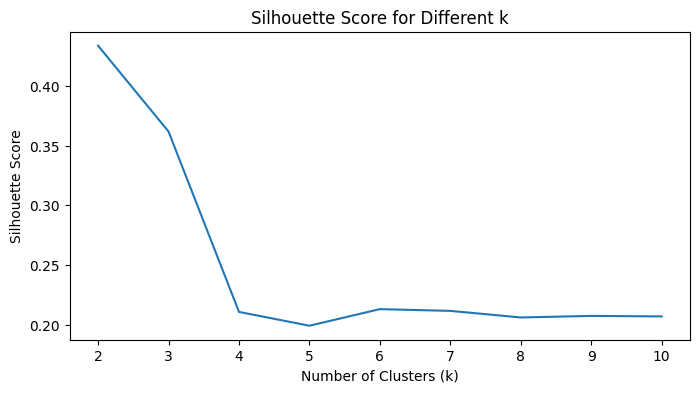

In [56]:
X = df_scaled[['Age', 'Income','Total Time Spent','Time per Session','Engagement Efficiency','Videos per Session','Video Consumption Ratio']]

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")
    
plt.figure(figsize=(8, 4))
plt.plot(list(K_range), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.show()

In [57]:
best_k = 3

kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

df_scaled['Cluster'] = cluster_labels

print("Cluster counts: ")
print(df_scaled['Cluster'].value_counts())

Cluster counts: 
Cluster
2    782
1    151
0     67
Name: count, dtype: int64


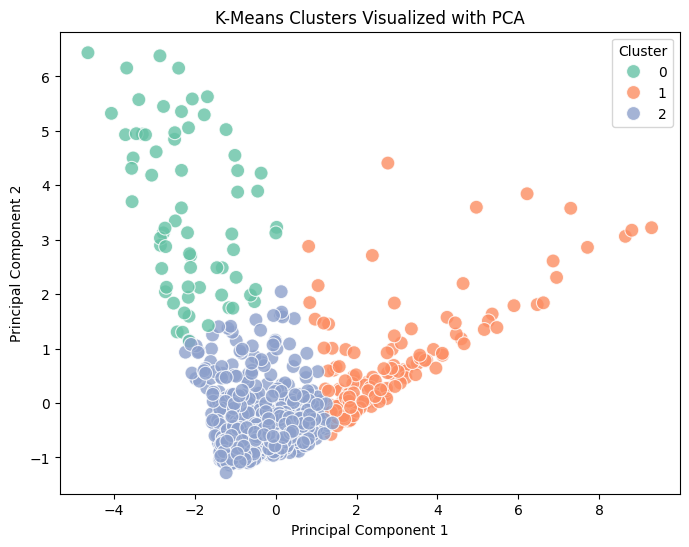

In [58]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="Set2", s=100, alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters Visualized with PCA")
plt.legend(title="Cluster")
plt.show()


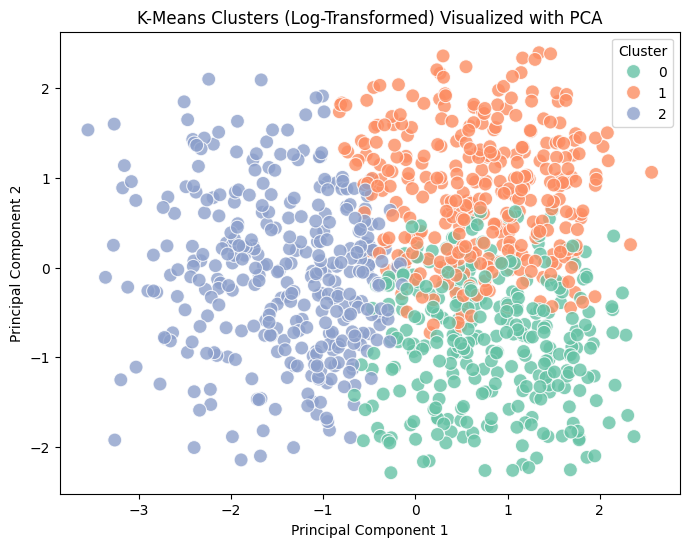

In [59]:
X = df_scaled[['Age', 'Income','Total Time Spent','Time per Session_log','Engagement Efficiency_log','Videos per Session_log','Video Consumption Ratio_log']]
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
df_scaled['Cluster_Log'] = clusters

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", s=100, alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (Log-Transformed) Visualized with PCA")
plt.legend(title="Cluster")
plt.show()

In [60]:
features = [
    'Age', 'Income', 'Total Time Spent',
    'Time per Session', 'Engagement Efficiency',
    'Videos per Session', 'Video Consumption Ratio',
    'Time per Session_log', 'Engagement Efficiency_log',
    'Videos per Session_log', 'Video Consumption Ratio_log'
]
cluster_means = df_scaled.groupby('Cluster_Log')[features].mean()
print(cluster_means)
# Remember its standardized

                  Age  ...  Video Consumption Ratio_log
Cluster_Log            ...                             
0           -0.958388  ...                    -0.560031
1            0.832862  ...                    -0.523815
2           -0.008361  ...                     0.314326

[3 rows x 11 columns]


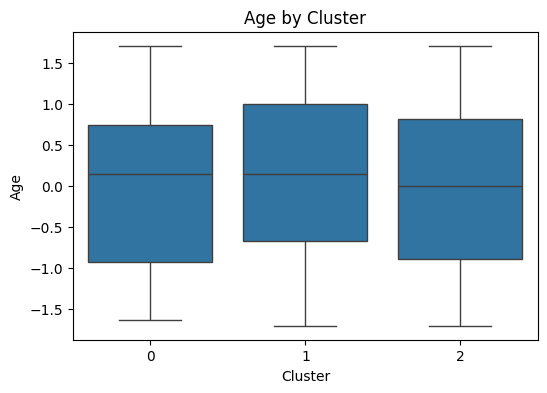

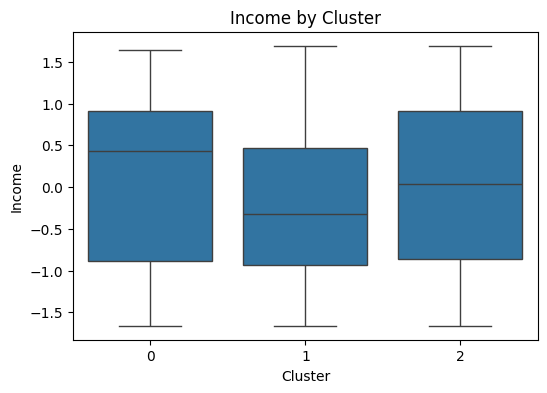

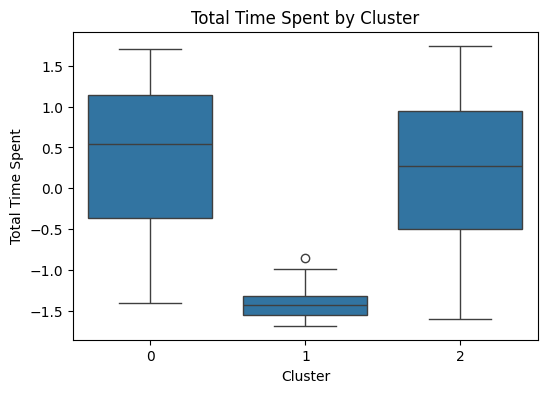

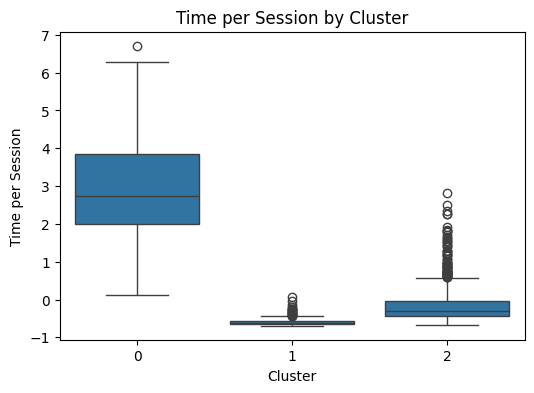

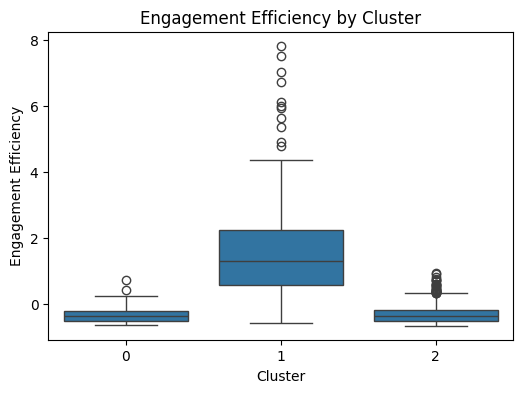

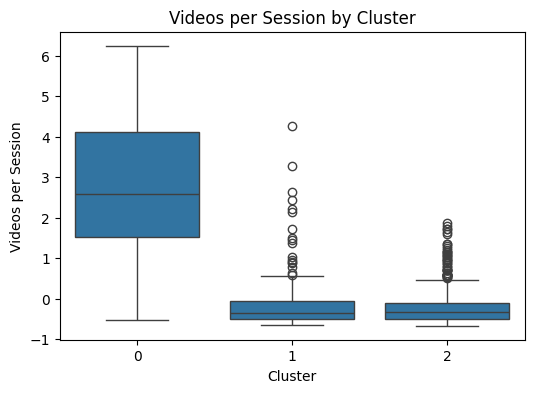

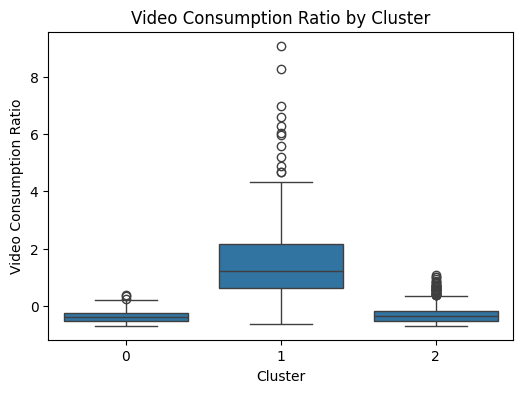

In [61]:

features_to_plot = [
    'Age', 'Income', 'Total Time Spent', 
    'Time per Session', 'Engagement Efficiency', 
    'Videos per Session', 'Video Consumption Ratio'
]

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=feature, data=df_scaled)
    plt.title(f'{feature} by Cluster')
    plt.show()


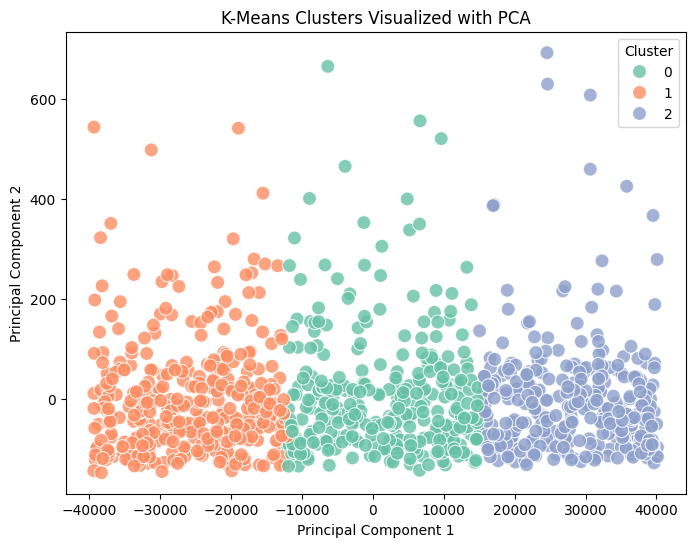

In [62]:
# Just curious about what the non-standardized dataset would show up with

X = df[['Age', 'Income','Total Time Spent','Time per Session','Engagement Efficiency','Videos per Session','Video Consumption Ratio']]
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster_Log'] = clusters

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", s=100, alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters Visualized with PCA")
plt.legend(title="Cluster")
plt.show()